# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 3.3: Medidas de avaliação**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta o uso das medidas de avaliação*

In [1]:
# Imports
import random
import numpy as np

In [2]:
#Gerando dados aleatórios
random.seed(42)

y_true = [random.randint(0, 1) for _ in range(20)]
y_one = np.ones(20)
y_pred = [random.randint(0, 1) for _ in range(20)]
y_probs = [random.uniform(0, 1) for _ in range(20)]

y_true, y_pred, y_probs

([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],
 [0.552040631273227,
  0.8294046642529949,
  0.6185197523642461,
  0.8617069003107772,
  0.577352145256762,
  0.7045718362149235,
  0.045824383655662215,
  0.22789827565154686,
  0.28938796360210717,
  0.0797919769236275,
  0.23279088636103018,
  0.10100142940972912,
  0.2779736031100921,
  0.6356844442644002,
  0.36483217897008424,
  0.37018096711688264,
  0.2095070307714877,
  0.26697782204911336,
  0.936654587712494,
  0.6480353852465935])

## Matriz de confusão

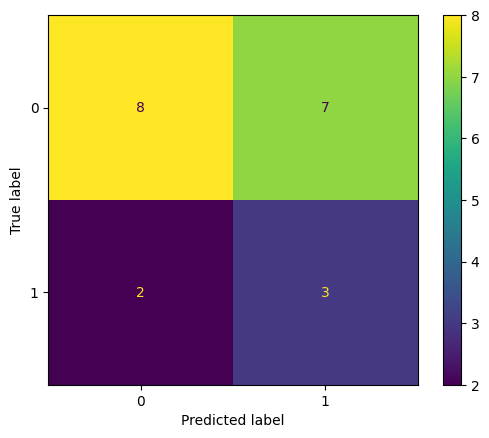

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

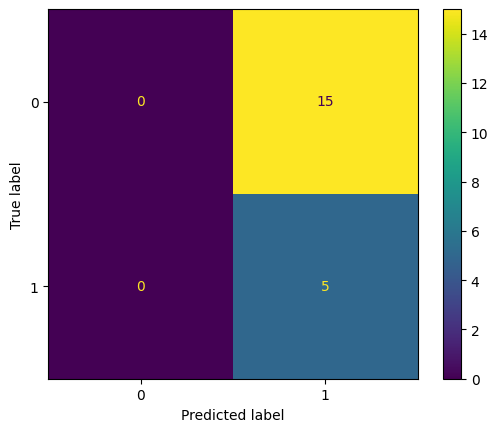

In [4]:
cm = confusion_matrix(y_true, y_one)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Matriz de confusão utilizando condição com for como parâmetro


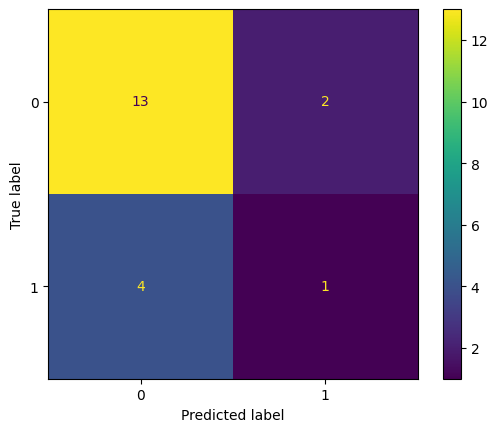

In [5]:
cm = confusion_matrix(y_true, [1 if x >= 0.8 else 0 for x in y_probs])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Medidas de avaliação binária

https://scikit-learn.org/stable/modules/model_evaluation.html

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Accuracy: ", accuracy_score(y_true, y_pred), accuracy_score(y_true, y_one))
print("Ballanced Accuracy: ", round(balanced_accuracy_score(y_true, y_pred), 2), balanced_accuracy_score(y_true, y_one))
print("Precision: ", precision_score(y_true, y_pred), precision_score(y_true, y_one))
print("Recall: ", recall_score(y_true, y_pred), recall_score(y_true, y_one))
print("F1: ", f1_score(y_true, y_pred), f1_score(y_true, y_one))
print("AUC: ", roc_auc_score(y_true, y_probs), roc_auc_score(y_true, y_one))

Accuracy:  0.55 0.25
Ballanced Accuracy:  0.57 0.5
Precision:  0.3 0.25
Recall:  0.6 1.0
F1:  0.4 0.4
AUC:  0.64 0.5


### Precisão x Revocação

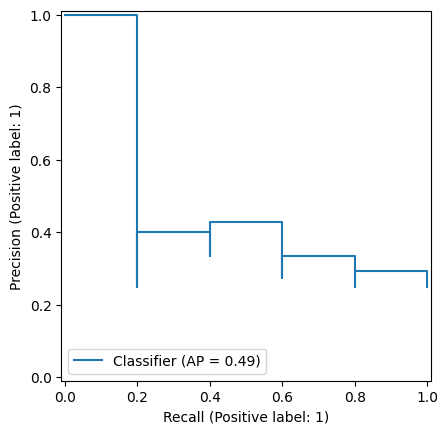

In [7]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_true, y_probs)

In [8]:
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

pd.DataFrame({'thresholds': np.insert(thresholds, 0, 0),
              'precision': precision,
              'recall': recall })

,thresholds,precision,recall
0,0.000000,0.250000,1.0
1,0.045824,0.263158,1.0
2,0.079792,0.277778,1.0
3,0.101001,0.294118,1.0
4,0.209507,0.250000,0.8
5,0.227898,0.266667,0.8
6,0.232791,0.285714,0.8
7,0.266978,0.307692,0.8
8,0.277974,0.333333,0.8
9,0.289388,0.272727,0.6


### AUC ROC

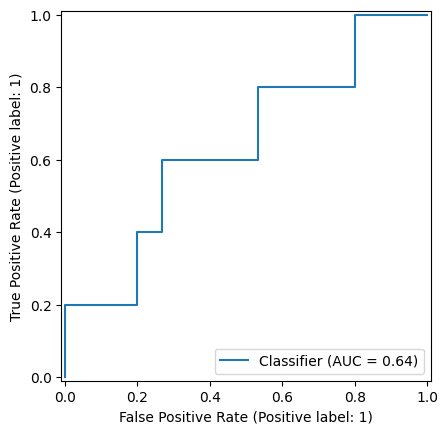

In [9]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_probs)
RocCurveDisplay.from_predictions(y_true, y_probs)

In [10]:
pd.DataFrame({'thresholds': thresholds,
              'TPR': tpr,
              'FPR': fpr }).sort_values(by='thresholds')

,thresholds,TPR,FPR
10,0.045824,1.0,1.000000
9,0.209507,1.0,0.800000
8,0.227898,0.8,0.800000
7,0.289388,0.8,0.533333
6,0.364832,0.6,0.533333
5,0.618520,0.6,0.266667
4,0.635684,0.4,0.266667
3,0.648035,0.4,0.200000
2,0.704572,0.2,0.200000
1,0.936655,0.2,0.000000


## Medidas de avaliação multi-classe

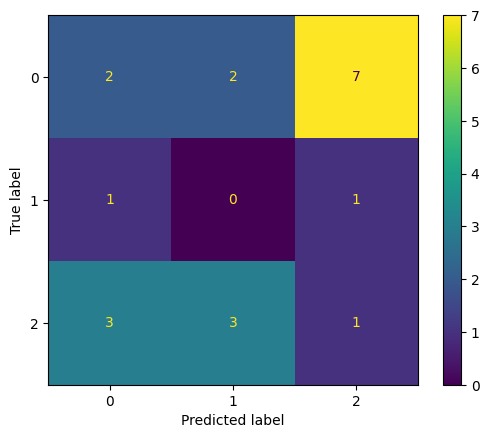

In [11]:
random.seed(42)

y_true = [random.randint(0, 2) for _ in range(20)]
y_pred = [random.randint(0, 2) for _ in range(20)]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

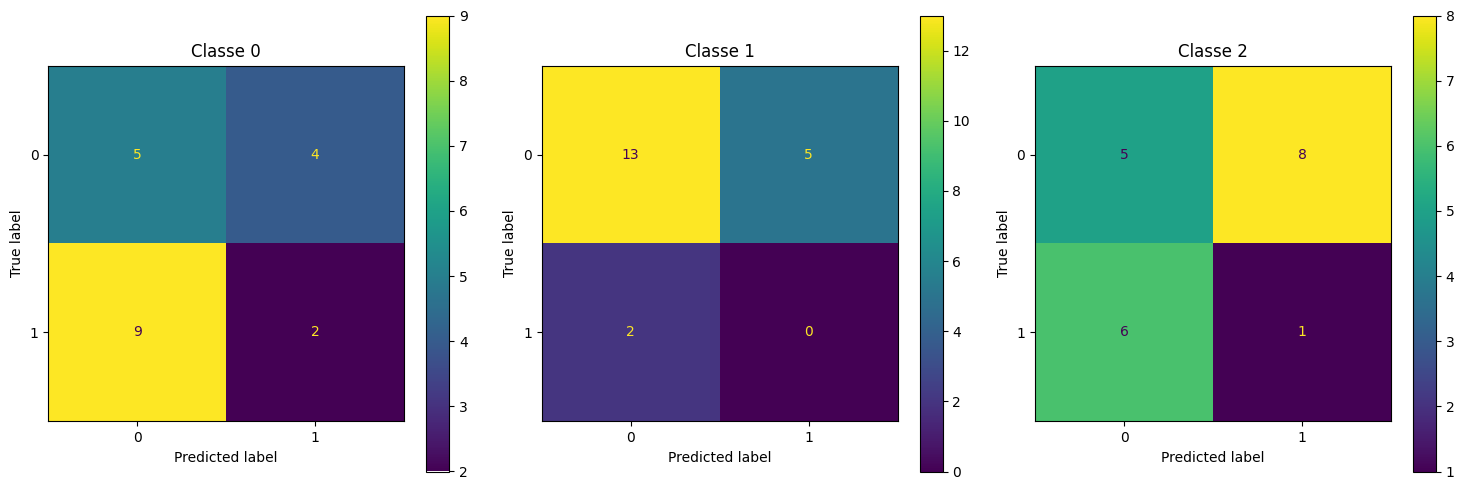

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def binary_confusion_matrix(y_true, y_pred, class_label):
    """
    Esta função calcula a matriz de confusão binária para uma classe específica.
    """
    y_true_binary = np.where(y_true == class_label, 1, 0)
    y_pred_binary = np.where(y_pred == class_label, 1, 0)
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    return cm

# Defina as classes
classes = np.unique(y_true)

# Crie subplots
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

# Para cada classe, gere e plote a matriz de confusão binária
for i, classe in enumerate(classes):
    cm = binary_confusion_matrix(y_true, y_pred, classe)
    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax)
    disp.ax_.set_title(f'Classe {classe}')


plt.tight_layout()
plt.show()

In [13]:
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Ballanced Accuracy: ", round(balanced_accuracy_score(y_true, y_pred), 2))
print("Precision: macro/micro/weighted", round(precision_score(y_true, y_pred, average='macro'), 2), \
        round(precision_score(y_true, y_pred, average='micro'), 2), round(precision_score(y_true, y_pred, average='weighted'), 2))

print("Recall: macro/micro/weighted", round(recall_score(y_true, y_pred, average='macro'), 2), \
        round(recall_score(y_true, y_pred, average='micro'), 2), round(recall_score(y_true, y_pred, average='weighted'), 2))

print("F1: macro/micro/weighted", round(f1_score(y_true, y_pred, average='macro'), 2), \
        round(f1_score(y_true, y_pred, average='micro'), 2), round(f1_score(y_true, y_pred, average='weighted'), 2))

Accuracy:  0.15
Ballanced Accuracy:  0.11
Precision: macro/micro/weighted 0.15 0.15 0.22
Recall: macro/micro/weighted 0.11 0.15 0.15
F1: macro/micro/weighted 0.12 0.15 0.17
